Found 150 images belonging to 3 classes.
Found 22 images belonging to 3 classes.
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730094145.661850     106 service.cc:145] XLA service 0x7fde9c002270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730094145.661944     106 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/4 ━━━━━━━━━━━━━━━━━━━━ 42s 14s/step - accuracy: 0.3125 - loss: 1.2948

I0000 00:00:1730094151.368597     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3000 - loss: 1.5391 - val_accuracy: 0.4545 - val_loss: 1.1432
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2812 - loss: 1.7850 - val_accuracy: 0.6818 - val_loss: 0.8638
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5225 - loss: 0.9378 - val_accuracy: 0.6818 - val_loss: 0.7587
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5312 - loss: 0.7743 - val_accuracy: 0.6818 - val_loss: 0.6214
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8521 - loss: 0.5305 - val_accuracy: 0.8182 - val_loss: 0.5300
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7273 - loss: 0.6666 - val_accuracy: 0.7727 - val_loss: 0.4760
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8146 - loss: 0.4862 - val_accuracy: 0.7273 - val_loss: 0.4723
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7273 - loss: 0.7011 - val_accuracy: 0.7727 - val_loss: 0.4036
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8033 - loss: 0.4679 - val_accuracy: 0.9091 - val_loss: 0.2626
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8438 - loss: 0.3413 - val_accuracy: 0.9545 - val_loss: 0.2327
Found 22 i

/tmp/ipykernel_29/3285292119.py:75: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[7 0 0]
 [0 7 0]
 [1 0 7]]


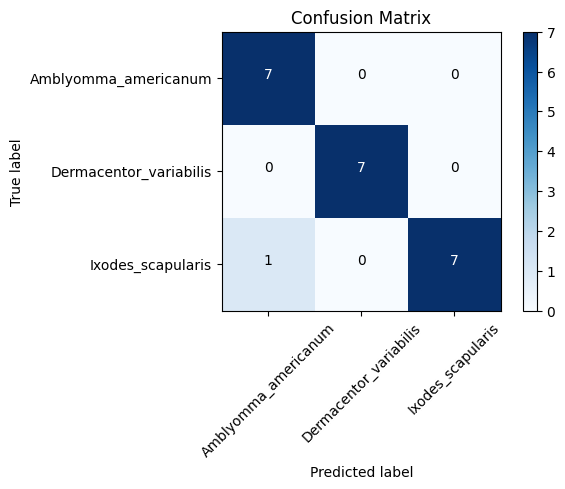

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import itertools

# 数据预处理
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'ticks-data/ticks_data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'ticks-data/ticks_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# 加载ResNet50V2模型
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 冻结ResNet50V2的层
for layer in base_model.layers:
    layer.trainable = False

# 添加自定义层
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# 评估模型并输出混淆矩阵
test_generator = test_datagen.flow_from_directory(
    'ticks-data/ticks_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 获取预测结果
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 计算混淆矩阵
cm = confusion_matrix(true_classes, predicted_classes)

# 打印混淆矩阵
print(cm)

# 可视化混淆矩阵
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 显示混淆矩阵图
plot_confusion_matrix(cm, class_labels)
plt.show()
